In [1]:
import pandas as pd

### 1) DatetimeIndexing

In [3]:
df = pd.read_csv('./dataset/tatamotors-jan-nov2020 .csv', parse_dates=['Date'], index_col='Date')
df.columns = map(str.lower, df.columns)
df.index.name = df.index.name.lower()
df.head()

,open,high,low,close,volume
date,,,,,
2020-01-02 15:30:00,185.0,194.70,184.60,193.75,57289863
2020-01-03 15:30:00,192.9,195.65,189.25,191.10,47572728
2020-01-06 15:30:00,191.0,191.00,185.05,185.65,28621212
2020-01-07 15:30:00,187.0,189.40,182.30,184.70,34995035
2020-01-08 15:30:00,180.2,184.20,180.20,182.55,21862695


In [4]:
df.shape

(224, 5)

In [5]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
df.index.name

'date'

In [7]:
# average stock price in the month of JANUARY
df['2020-01'].close.mean()

189.52045454545453

In [8]:
df['2020-01-01':'2020-01-07']

,open,high,low,close,volume
date,,,,,
2020-01-02 15:30:00,185.0,194.70,184.60,193.75,57289863
2020-01-03 15:30:00,192.9,195.65,189.25,191.10,47572728
2020-01-06 15:30:00,191.0,191.00,185.05,185.65,28621212
2020-01-07 15:30:00,187.0,189.40,182.30,184.70,34995035


### 2) Resampling

In [9]:
# calculating monthly average of close price for the year 2020
df.close.resample('M').mean()

date
2020-01-31    189.520455
2020-02-29    162.265000
2020-03-31     89.361905
2020-04-30     74.766667
2020-05-31     83.876316
2020-06-30    102.184091
2020-07-31    105.219565
2020-08-31    125.542857
2020-09-30    141.225000
2020-10-31    134.061905
2020-11-30    148.826667
Freq: M, Name: close, dtype: float64

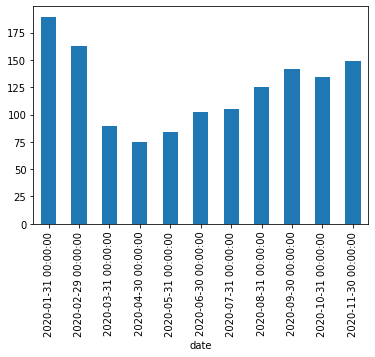

In [10]:
# plotting weeakly chart
%matplotlib inline
df.close.resample('M').mean().plot(kind='bar')

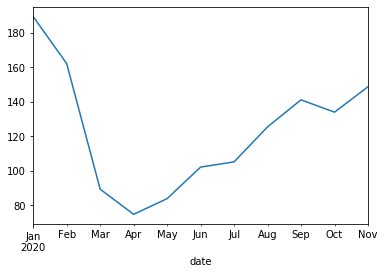

In [11]:
df.close.resample('M').mean().plot()

In [12]:
df.tail()

,open,high,low,close,volume
date,,,,,
2020-11-14 20:00:00,148.70,150.80,148.00,148.85,11749453
2020-11-17 15:30:00,152.50,159.35,152.20,158.00,82644841
2020-11-18 15:30:00,158.85,178.80,158.55,173.50,171801183
2020-11-19 15:30:00,171.40,176.35,166.55,167.95,109449407
2020-11-20 15:30:00,170.05,171.55,165.55,169.10,66935703


### 3) date_range
* for handling datset without dateframe

In [13]:
df_x = pd.read_csv(src+'tatamotors-jan-nov2020-no_date.csv')
df_x.columns = map(str.lower, df_x.columns)
df_x.head()

,open,high,low,close,volume
0,185.0,194.70,184.60,193.75,57289863
1,192.9,195.65,189.25,191.10,47572728
2,191.0,191.00,185.05,185.65,28621212
3,187.0,189.40,182.30,184.70,34995035
4,180.2,184.20,180.20,182.55,21862695


In [14]:
df_x.shape

(224, 5)

In [15]:
# here we are forced to provide period because 'date_range' will not handle holidays specific to any calendar
# we will discuss later about how to solve this.
rng = pd.date_range(start='01/02/2020', periods=224, freq='B', name='date')
rng

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02',
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-09', '2020-11-10'],
              dtype='datetime64[ns]', name='date', length=224, freq='B')

In [16]:
df_x.set_index(rng, inplace=True)

In [17]:
df_x.head()

,open,high,low,close,volume
date,,,,,
2020-01-02,185.0,194.70,184.60,193.75,57289863
2020-01-03,192.9,195.65,189.25,191.10,47572728
2020-01-06,191.0,191.00,185.05,185.65,28621212
2020-01-07,187.0,189.40,182.30,184.70,34995035
2020-01-08,180.2,184.20,180.20,182.55,21862695


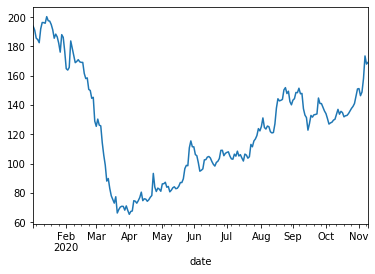

In [18]:
df_x.close.plot()

In [19]:
# so if we want to have datas also for weekends , we can use pandas asfreq() method, it will use the 
# same data as of very next/previous working day.

df_x.asfreq(freq='D', method='pad')

,open,high,low,close,volume
date,,,,,
2020-01-02,185.00,194.70,184.60,193.75,57289863
2020-01-03,192.90,195.65,189.25,191.10,47572728
2020-01-04,192.90,195.65,189.25,191.10,47572728
2020-01-05,192.90,195.65,189.25,191.10,47572728
2020-01-06,191.00,191.00,185.05,185.65,28621212
...,...,...,...,...,...
2020-11-06,158.85,178.80,158.55,173.50,171801183
2020-11-07,158.85,178.80,158.55,173.50,171801183
2020-11-08,158.85,178.80,158.55,173.50,171801183


In [20]:
rng = pd.date_range(start='01/02/2020', periods=20, freq='B')
rng

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='B')

In [21]:
import numpy as np

In [22]:
ts = pd.Series(np.random.randint(1,10, size=len(rng)), index=rng)
ts.head(10)

2020-01-02    9
2020-01-03    6
2020-01-06    7
2020-01-07    2
2020-01-08    2
2020-01-09    1
2020-01-10    4
2020-01-13    7
2020-01-14    8
2020-01-15    1
Freq: B, dtype: int64

### 4)Deals with Holidays to specific locations or calandars

In [23]:
import requests
from bs4 import BeautifulSoup

In [24]:
# we are using datas of indian stock market and we don't have the date column with us,
# so we need to create it but pandas only have  "USFederalHolidayCalendar" function which only condains holiday
# info for USA . so inorder to get indian stockmarket holiday we are going to scrap the data from a wesite
# using BeautifulSoup library

req = requests.get('https://www.tradinghours.com/exchanges/nse-india/market-holidays/2020')
print(type(req))

<class 'requests.models.Response'>


In [25]:
soup = BeautifulSoup(req.text, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [26]:
# we use CSS selector instead of RegEx
soup.select('td[data-title="Observed Date"]')

[<td data-title="Observed Date"> February 21, 2020 </td>,
 <td data-title="Observed Date"> March 10, 2020 </td>,
 <td data-title="Observed Date"> April 2, 2020 </td>,
 <td data-title="Observed Date"> April 6, 2020 </td>,
 <td data-title="Observed Date"> April 10, 2020 </td>,
 <td data-title="Observed Date"> April 14, 2020 </td>,
 <td data-title="Observed Date"> May 1, 2020 </td>,
 <td data-title="Observed Date"> May 25, 2020 </td>,
 <td data-title="Observed Date"> October 2, 2020 </td>,
 <td data-title="Observed Date"> November 16, 2020 </td>,
 <td data-title="Observed Date"> November 30, 2020 </td>,
 <td data-title="Observed Date"> December 25, 2020 </td>]

In [27]:
# saving all holiday dates to a list
holidays_ind = []
for l in  soup.select('td[data-title="Observed Date"]'):
    holidays_ind.append(l.text)

In [28]:
holidays_ind

[' February 21, 2020 ',
 ' March 10, 2020 ',
 ' April 2, 2020 ',
 ' April 6, 2020 ',
 ' April 10, 2020 ',
 ' April 14, 2020 ',
 ' May 1, 2020 ',
 ' May 25, 2020 ',
 ' October 2, 2020 ',
 ' November 16, 2020 ',
 ' November 30, 2020 ',
 ' December 25, 2020 ']

In [29]:
# converting the date datas into pandas timestamp
holidays_dt = pd.to_datetime(pd.Series(holidays_ind))

In [30]:
stockmkt_holidays = pd.tseries.offsets.CustomBusinessDay(holidays=holidays_dt)

In [31]:
rng = pd.date_range(start='01/02/2020', end='11/20/2020', freq=stockmkt_holidays, name='date')
rng

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', name='date', length=222, freq='C')

In [32]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
from pandas.tseries.offsets import CustomBusinessDay

class myBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('New Year', month=1, day=1, observance=nearest_workday),
     Holiday('Maha Shivratri Day', month=2, day=21, observance=nearest_workday),
     #Holiday('Holi', month=3, day=10, observance=nearest_workday),
     Holiday('Ram Navami ', month=4, day=2, observance=nearest_workday),
     Holiday('Mahavir Jayanti', month=4, day=6, observance=nearest_workday),
     Holiday('Good Friday ', month=4, day=10, observance=nearest_workday),
     Holiday('Dr.Baba Saheb Ambedkar Jayanti ', month=4, day=14, observance=nearest_workday),
     Holiday('Maharashtra Day', month=5, day=1, observance=nearest_workday),
     Holiday('Eid al-Fitr', month=5, day=25, observance=nearest_workday),
     Holiday('Mahatma Gandhi Jayanti ', month=10, day=2, observance=nearest_workday),
     #Holiday('Diwali', month=10, day=16, observance=nearest_workday),
   ]
# here we have excludec holi and deepavali because in our dataset it is considered as working days.
myc = CustomBusinessDay(calendar=myBusinessCalendar())
myc

<CustomBusinessDay>

In [33]:
pd.date_range(start='01/02/2020', end='11/20/2020', freq=myc)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', length=224, freq='C')

In [34]:
# in Egypt weekend: friday and saturday

b = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu')
pd.date_range(start='11/01/2020', end='11/20/2020', freq=b)

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', freq='C')

### 5) to_datetime
* date format can be of any form like, <br>
'2020-01-11', <br>
'Jan 1, 2020', <br>
'03/02/2020', <br>
'2020.4.23', <br>
'2020/4/23' etc.<br>
in USA date   : mm/dd/yyyy <br>
in europe date: dd/mm/yyyy

In [35]:
# most common problem in data analysis is lack of uniformity in the structure of input data.

dates = ['2020-01-11 2:30:00 PM','Jan 11, 2020 14:30:00','01/11/2020','2020.01.11','2020/01/11', '20200111']
pd.to_datetime(dates)

DatetimeIndex(['2020-01-11 14:30:00', '2020-01-11 14:30:00',
               '2020-01-11 00:00:00', '2020-01-11 00:00:00',
               '2020-01-11 00:00:00', '2020-01-11 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [36]:
# for european date
# 2nd november 2020
pd.to_datetime('02/11/2020', dayfirst=True)

Timestamp('2020-11-02 00:00:00')

In [37]:
pd.to_datetime('02$11$2020', format='%d$%m$%Y')

Timestamp('2020-11-02 00:00:00')

In [38]:
dates = dates + ['abc']
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2020-01-11 14:30:00', '2020-01-11 14:30:00',
               '2020-01-11 00:00:00', '2020-01-11 00:00:00',
               '2020-01-11 00:00:00', '2020-01-11 00:00:00',
                               'NaT'],
              dtype='datetime64[ns]', freq=None)

In [39]:
# epochs (unix time) is number of seconds passed that have passed since "Jan, 1 1970 00:00:00 UTC"

t = 1606674042
dt = pd.to_datetime([t], unit='s')
dt

DatetimeIndex(['2020-11-29 18:20:42'], dtype='datetime64[ns]', freq=None)

In [40]:
# convert back to epoch time

dt.view('int64')

array([1606674042000000000])

### 6)Timestamp, Timespan,  Period and PeriodIndex

In [41]:
# yearly time period

y = pd.Period('2019')
y

Period('2019', 'A-DEC')

In [42]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [43]:
y.start_time

Timestamp('2019-01-01 00:00:00')

In [44]:
y.end_time

Timestamp('2019-12-31 23:59:59.999999999')

In [45]:
y.is_leap_year

False

In [46]:
# monthly time period

m = pd.Period('2011-01', freq='M')
m

Period('2011-01', 'M')

In [47]:
m.start_time, m.end_time

(Timestamp('2011-01-01 00:00:00'), Timestamp('2011-01-31 23:59:59.999999999'))

In [48]:
m + 1

Period('2011-02', 'M')

In [49]:
d = pd.Period('2016-02-28')
d

Period('2016-02-28', 'D')

In [50]:
d + 1 # 2016 is a leap_year

Period('2016-02-29', 'D')

In [51]:
h = pd.Period('2020-01-01 23:00:00', freq='H')
h

Period('2020-01-01 23:00', 'H')

In [52]:
h.start_time, h.end_time

(Timestamp('2020-01-01 23:00:00'), Timestamp('2020-01-01 23:59:59.999999999'))

In [53]:
h + 1 

Period('2020-01-02 00:00', 'H')

In [54]:
h + pd.offsets.Hour(2)

Period('2020-01-02 01:00', 'H')

In [55]:
# quarterly time period

q = pd.Period('2017Q1')
q

Period('2017Q1', 'Q-DEC')

In [56]:
q + 1

Period('2017Q2', 'Q-DEC')

In [57]:
q + 2

Period('2017Q3', 'Q-DEC')

In [58]:
# specifiying start and end time for quarterly ,  eg: walmart have fisical year ending in JAN and start in FEB

q_w = pd.Period('2020Q1', freq='Q-JAN')
q_w

Period('2020Q1', 'Q-JAN')

In [59]:
q_w.start_time, q_w.end_time

(Timestamp('2019-02-01 00:00:00'), Timestamp('2019-04-30 23:59:59.999999999'))

In [60]:
# convert one freq into another
q_w.asfreq('M', how='start')

Period('2019-02', 'M')

In [61]:
q2 =  pd.Period('2018Q1', freq='Q-DEC')
q2

Period('2018Q1', 'Q-DEC')

In [62]:
q2 - q

<4 * QuarterEnds: startingMonth=12>

In [63]:
idx = pd.period_range('2011', '2014', freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [64]:
idx[0].start_time, idx[0].end_time

(Timestamp('2010-11-01 00:00:00'), Timestamp('2011-01-31 23:59:59.999999999'))

In [65]:
import numpy as np

In [66]:
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2011Q4   -0.804317
2012Q1    0.703825
2012Q2   -1.495988
2012Q3    2.580680
2012Q4   -0.759860
2013Q1   -1.329355
2013Q2    0.155563
2013Q3   -0.867673
2013Q4    0.112189
2014Q1    1.227759
2014Q2   -0.309743
2014Q3    0.169652
2014Q4   -1.340656
Freq: Q-JAN, dtype: float64

In [67]:
ps.index

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [68]:
# converts from period index to date-time index
pst = ps.to_timestamp()
pst

2010-11-01   -0.804317
2011-02-01    0.703825
2011-05-01   -1.495988
2011-08-01    2.580680
2011-11-01   -0.759860
2012-02-01   -1.329355
2012-05-01    0.155563
2012-08-01   -0.867673
2012-11-01    0.112189
2013-02-01    1.227759
2013-05-01   -0.309743
2013-08-01    0.169652
2013-11-01   -1.340656
Freq: QS-NOV, dtype: float64

In [69]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01', '2013-05-01', '2013-08-01',
               '2013-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [70]:
pst.to_period()

2010Q4   -0.804317
2011Q1    0.703825
2011Q2   -1.495988
2011Q3    2.580680
2011Q4   -0.759860
2012Q1   -1.329355
2012Q2    0.155563
2012Q3   -0.867673
2012Q4    0.112189
2013Q1    1.227759
2013Q2   -0.309743
2013Q3    0.169652
2013Q4   -1.340656
Freq: Q-DEC, dtype: float64

In [71]:
# EXERSISE 1
# wall mart financial report

df_wall = pd.read_csv(src + 'wmt.csv')
df_wall

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [72]:
df_wall.set_index('Line Item', inplace=True)
df_wall

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [73]:
df_wall = df_wall.T
df_wall

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [74]:
df_wall.index = pd.PeriodIndex(df_wall.index, freq='Q-JAN')
df_wall.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [75]:
# generating start and end time
df_wall['start date'], df_wall['end date'] = df_wall.index.map(lambda x: x.start_time), df_wall.index.map(lambda x: x.end_time)
df_wall

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


### 7) timezone handling
* two types of datetime <br>
1) Naive datetime (not aware of timezone) <br>
2) Timezone aware datetime

In [76]:
df_msft = pd.read_csv(src + 'msft.csv', header=1, index_col='Date Time', parse_dates=True)
df_msft

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [77]:
df_msft.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [78]:
# india- 'Asia/Kolkata', USA- 'US/Eastern', Germany- 'Europe/Berlin'
df_msft = df_msft.tz_localize(tz='US/Eastern')
df_msft.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [79]:
df_msft = df_msft.tz_convert(tz='Europe/Berlin')
df_msft.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [80]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [81]:
df_msft.index = df_msft.index.tz_convert(tz='Asia/Kolkata')
df_msft

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


In [82]:
# dateutil uses all available timezone in operating system
rng = pd.date_range('01/01/2017', periods=10, freq='H', tz='dateutil/Asia/Kolkata')
rng

DatetimeIndex(['2017-01-01 00:00:00+05:30', '2017-01-01 01:00:00+05:30',
               '2017-01-01 02:00:00+05:30', '2017-01-01 03:00:00+05:30',
               '2017-01-01 04:00:00+05:30', '2017-01-01 05:00:00+05:30',
               '2017-01-01 06:00:00+05:30', '2017-01-01 07:00:00+05:30',
               '2017-01-01 08:00:00+05:30', '2017-01-01 09:00:00+05:30'],
              dtype='datetime64[ns, tzfile('/usr/share/zoneinfo/Asia/Kolkata')]', freq='H')

In [83]:
rng = pd.date_range('2020-11-30 09:00:00', periods=10, freq='30min')
s = pd.Series(range(10), index=rng)
s

2020-11-30 09:00:00    0
2020-11-30 09:30:00    1
2020-11-30 10:00:00    2
2020-11-30 10:30:00    3
2020-11-30 11:00:00    4
2020-11-30 11:30:00    5
2020-11-30 12:00:00    6
2020-11-30 12:30:00    7
2020-11-30 13:00:00    8
2020-11-30 13:30:00    9
Freq: 30T, dtype: int64

In [84]:
b = s.tz_localize(tz='Europe/Berlin')
b

2020-11-30 09:00:00+01:00    0
2020-11-30 09:30:00+01:00    1
2020-11-30 10:00:00+01:00    2
2020-11-30 10:30:00+01:00    3
2020-11-30 11:00:00+01:00    4
2020-11-30 11:30:00+01:00    5
2020-11-30 12:00:00+01:00    6
2020-11-30 12:30:00+01:00    7
2020-11-30 13:00:00+01:00    8
2020-11-30 13:30:00+01:00    9
Freq: 30T, dtype: int64

In [85]:
m = s.tz_localize(tz='Asia/Kolkata')
m

2020-11-30 09:00:00+05:30    0
2020-11-30 09:30:00+05:30    1
2020-11-30 10:00:00+05:30    2
2020-11-30 10:30:00+05:30    3
2020-11-30 11:00:00+05:30    4
2020-11-30 11:30:00+05:30    5
2020-11-30 12:00:00+05:30    6
2020-11-30 12:30:00+05:30    7
2020-11-30 13:00:00+05:30    8
2020-11-30 13:30:00+05:30    9
Freq: 30T, dtype: int64

In [86]:
# pandas will automatically allign and do math operations.
b + m

2020-11-30 03:30:00+00:00    NaN
2020-11-30 04:00:00+00:00    NaN
2020-11-30 04:30:00+00:00    NaN
2020-11-30 05:00:00+00:00    NaN
2020-11-30 05:30:00+00:00    NaN
2020-11-30 06:00:00+00:00    NaN
2020-11-30 06:30:00+00:00    NaN
2020-11-30 07:00:00+00:00    NaN
2020-11-30 07:30:00+00:00    NaN
2020-11-30 08:00:00+00:00    9.0
2020-11-30 08:30:00+00:00    NaN
2020-11-30 09:00:00+00:00    NaN
2020-11-30 09:30:00+00:00    NaN
2020-11-30 10:00:00+00:00    NaN
2020-11-30 10:30:00+00:00    NaN
2020-11-30 11:00:00+00:00    NaN
2020-11-30 11:30:00+00:00    NaN
2020-11-30 12:00:00+00:00    NaN
2020-11-30 12:30:00+00:00    NaN
Freq: 30T, dtype: float64

### 8) Shifting and Lagging

In [87]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [88]:
df_fb = pd.read_csv(src + 'fb.csv', parse_dates=True, index_col='Date')
df_fb

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [89]:
df_fb.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [90]:
df_fb.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [91]:
df_fb['prev day price'] = df_fb['Price'].shift(1)
df_fb

,Price,prev day price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [92]:
df_fb['price change'] = df_fb['Price'] - df_fb['prev day price']
df_fb.style.applymap(color_negative_red, subset=['price change'])

,Price,prev day price,price change
Date,,,
2017-08-15 00:00:00,171.000000,nan,nan
2017-08-16 00:00:00,170.000000,171.000000,-1.000000
2017-08-17 00:00:00,166.910000,170.000000,-3.090000
2017-08-18 00:00:00,167.410000,166.910000,0.500000
2017-08-21 00:00:00,167.780000,167.410000,0.370000
2017-08-22 00:00:00,169.640000,167.780000,1.860000
2017-08-23 00:00:00,168.710000,169.640000,-0.930000
2017-08-24 00:00:00,167.740000,168.710000,-0.970000
2017-08-25 00:00:00,166.320000,167.740000,-1.420000


In [93]:
df_fb['5 day % return'] = (df_fb['Price'] - df_fb['Price'].shift(5))*100/df_fb['Price'].shift(5)
df_fb.style.applymap(color_negative_red, subset=['price change', '5 day % return'])

,Price,prev day price,price change,5 day % return
Date,,,,
2017-08-15 00:00:00,171.000000,nan,nan,nan
2017-08-16 00:00:00,170.000000,171.000000,-1.000000,nan
2017-08-17 00:00:00,166.910000,170.000000,-3.090000,nan
2017-08-18 00:00:00,167.410000,166.910000,0.500000,nan
2017-08-21 00:00:00,167.780000,167.410000,0.370000,nan
2017-08-22 00:00:00,169.640000,167.780000,1.860000,-0.795322
2017-08-23 00:00:00,168.710000,169.640000,-0.930000,-0.758824
2017-08-24 00:00:00,167.740000,168.710000,-0.970000,0.497274
2017-08-25 00:00:00,166.320000,167.740000,-1.420000,-0.651096


In [94]:
df_fb = df_fb[['Price']]
df_fb

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [95]:
df_fb.index = pd.date_range('2017-08-15', periods=10, freq='B')
df_fb

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [96]:
df_fb.tshift(3)

,Price
2017-08-18,171.00
2017-08-21,170.00
2017-08-22,166.91
2017-08-23,167.41
2017-08-24,167.78
2017-08-25,169.64
2017-08-28,168.71
2017-08-29,167.74
2017-08-30,166.32
2017-08-31,167.24


In [97]:
df_fb.tshift(-1)

,Price
2017-08-14,171.00
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [ ]:
# END